<a href="https://colab.research.google.com/github/190031319PHemanthBhargav/Machine-Learning-Models/blob/main/static%20data%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/chickpea.csv')
df

,1,2,3,4,5,6,7,8,9,10,11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,47,50,62,16,1,26,3,3,10,16,1,NaN,NaN,NaN,NaN,NaN
1,49,53,60,27,3,14,5,3,8,24,5,NaN,NaN,NaN,NaN,NaN
2,50,58,59,29,1,16,1,8,8,31,5,NaN,NaN,NaN,NaN,NaN
3,42,51,62,15,3,13,4,6,11,21,11,NaN,NaN,NaN,NaN,NaN
4,45,57,58,15,2,14,3,5,10,17,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55,50,60,28,2,9,5,6,11,30,5,NaN,NaN,NaN,NaN,NaN
196,52,54,58,21,3,20,7,7,12,17,1,NaN,NaN,NaN,NaN,NaN
197,51,57,66,17,2,27,7,4,14,13,13,NaN,NaN,NaN,NaN,NaN
198,54,56,65,28,3,18,7,4,12,14,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,47,50,62,16,1,26,3,3,10,16,1,NaN,NaN,NaN,NaN,NaN
1,49,53,60,27,3,14,5,3,8,24,5,NaN,NaN,NaN,NaN,NaN
2,50,58,59,29,1,16,1,8,8,31,5,NaN,NaN,NaN,NaN,NaN
3,42,51,62,15,3,13,4,6,11,21,11,NaN,NaN,NaN,NaN,NaN
4,45,57,58,15,2,14,3,5,10,17,10,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,49.250000,54.070000,62.615000,22.780000,2.035000,18.570000,4.270000,4.900000,11.425000,22.210000,7.390000
std,4.469607,2.843506,2.884158,4.673415,0.846972,6.517476,1.925001,2.064293,2.211067,6.000494,4.182748
min,42.000000,50.000000,58.000000,15.000000,1.000000,8.000000,1.000000,2.000000,8.000000,12.000000,1.000000
25%,45.000000,52.000000,60.000000,19.000000,1.000000,14.000000,3.000000,3.000000,10.000000,17.000000,4.000000
50%,49.000000,54.000000,63.000000,23.000000,2.000000,19.000000,4.000000,5.000000,11.000000,21.500000,7.000000
75%,53.000000,57.000000,65.000000,27.000000,3.000000,24.000000,6.000000,7.000000,13.000000,27.000000,11.000000
max,57.000000,59.000000,67.000000,30.000000,3.000000,30.000000,7.000000,8.000000,15.000000,32.000000,14.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       200 non-null    int64
 1   2       200 non-null    int64
 2   3       200 non-null    int64
 3   4       200 non-null    int64
 4   5       200 non-null    int64
 5   6       200 non-null    int64
 6   7       200 non-null    int64
 7   8       200 non-null    int64
 8   9       200 non-null    int64
 9   10      200 non-null    int64
 10  11      200 non-null    int64
dtypes: int64(11)
memory usage: 17.3 KB


In [ ]:
df.dropna().any()

1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11
0,47,50,62,16,1,26,3,3,10,16,1
1,49,53,60,27,3,14,5,3,8,24,5
2,50,58,59,29,1,16,1,8,8,31,5
3,42,51,62,15,3,13,4,6,11,21,11
4,45,57,58,15,2,14,3,5,10,17,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef123ef850>,
      dtype=object)

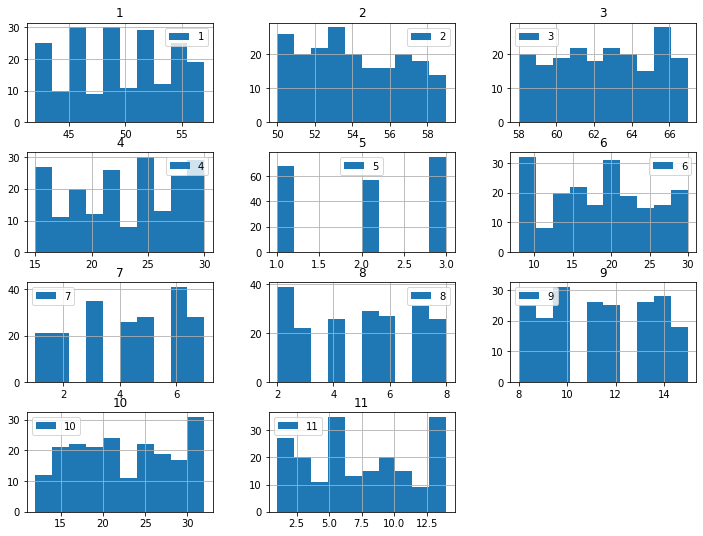

In [ ]:
df.hist(bins=10, figsize=(12, 9),legend=True)

,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46.6,53.8,60.2,20.4,2.0,16.6,3.2,5.0,9.4,21.8,6.4
5,46.0,53.8,59.4,22.0,2.4,15.4,3.6,4.8,9.0,22.2,6.8
6,45.6,53.8,60.6,20.0,2.4,18.0,3.8,4.6,9.4,21.2,8.0
7,47.0,52.6,60.4,17.8,2.6,18.8,3.8,4.4,10.6,20.4,8.4
8,47.2,53.0,59.6,19.6,2.2,20.6,4.2,4.8,11.0,21.2,7.6
9,47.2,53.0,61.4,20.2,2.0,22.2,4.2,4.2,10.6,21.2,7.4


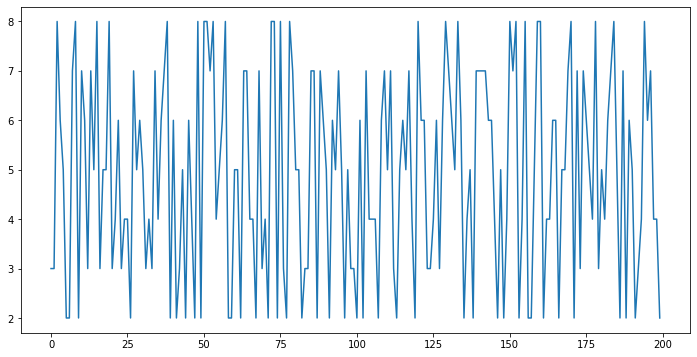

In [ ]:
df['8'].plot(figsize=(12,6))
df.rolling(5).mean().head(15)

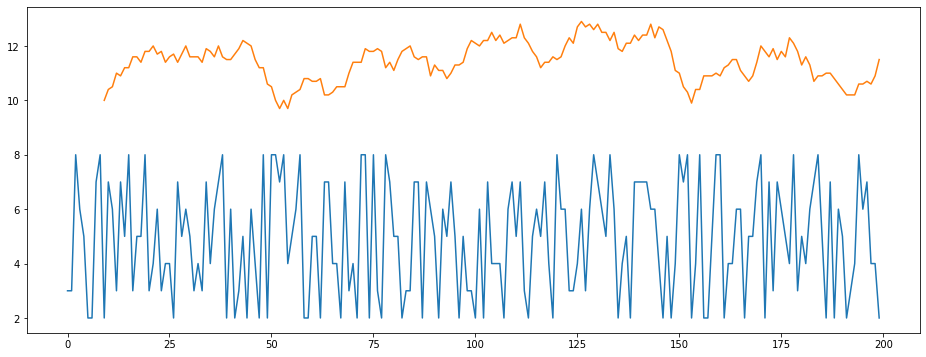

In [ ]:
df['8'].plot(figsize=(16,6))
df.rolling(window=10).mean()['9'].plot()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,df['10'],test_size=0.33,random_state=100)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print(len(x_train))

134


In [ ]:
print(len(y_train))

134


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=69,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=112, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))

model.add(Dropout(0.2))

model.add(Dense(units=156,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

In [ ]:
import tensorflow as tf
input_shape=x_train.shape
model.build(input_shape)
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (134, 69)                 828       
                                                                 
 dropout_8 (Dropout)         (134, 69)                 0         
                                                                 
 dense_9 (Dense)             (134, 112)                7840      
                                                                 
 dropout_9 (Dropout)         (134, 112)                0         
                                                                 
 dropout_10 (Dropout)        (134, 112)                0         
                                                                 
 dense_10 (Dense)            (134, 156)                17628     
                                                                 
 dropout_11 (Dropout)        (134, 156)               

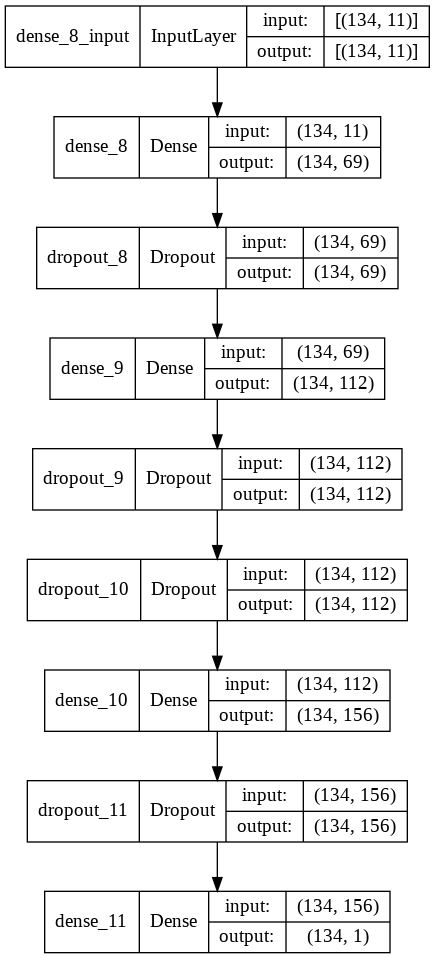

In [ ]:
tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=26)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 433.7551
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 152.8127
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 81.5748
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 49.6326
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 54.0968
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 48.3152
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 53.4526
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 38.8017
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 38.1532
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 38.1725
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 36.1735
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 36.4659
Epoch 13/100
6/6 [=============================

In [ ]:
test_df = pd.read_csv('/content/chickpea.csv')

In [ ]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10,11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,47,50,62,16,1,26,3,3,10,16,1,NaN,NaN,NaN,NaN,NaN
1,49,53,60,27,3,14,5,3,8,24,5,NaN,NaN,NaN,NaN,NaN
2,50,58,59,29,1,16,1,8,8,31,5,NaN,NaN,NaN,NaN,NaN
3,42,51,62,15,3,13,4,6,11,21,11,NaN,NaN,NaN,NaN,NaN
4,45,57,58,15,2,14,3,5,10,17,10,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.drop(test_df.columns[test_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       200 non-null    int64
 1   2       200 non-null    int64
 2   3       200 non-null    int64
 3   4       200 non-null    int64
 4   5       200 non-null    int64
 5   6       200 non-null    int64
 6   7       200 non-null    int64
 7   8       200 non-null    int64
 8   9       200 non-null    int64
 9   10      200 non-null    int64
 10  11      200 non-null    int64
dtypes: int64(11)
memory usage: 17.3 KB


In [ ]:
test_set = df['8']
test_set = pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   8       200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [ ]:
total = pd.concat((df['8'],test_df['8']),axis=0)
inputs= total[len(total)-len(test_df):].values
inputs=inputs.reshape(-1,1)

In [ ]:
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred = pd.DataFrame(pred)
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       66 non-null     float32
dtypes: float32(1)
memory usage: 392.0 bytes


In [ ]:
test_df = pd.merge(df,pred,how="left",left_index=True,right_index=True)

In [ ]:
test_df

,1,2,3,4,5,6,7,8,9,10,11,0
0,47,50,62,16,1,26,3,3,10,16,1,20.164797
1,49,53,60,27,3,14,5,3,8,24,5,12.738180
2,50,58,59,29,1,16,1,8,8,31,5,20.257391
3,42,51,62,15,3,13,4,6,11,21,11,17.566177
4,45,57,58,15,2,14,3,5,10,17,10,24.135736
...,...,...,...,...,...,...,...,...,...,...,...,...
195,55,50,60,28,2,9,5,6,11,30,5,NaN
196,52,54,58,21,3,20,7,7,12,17,1,NaN
197,51,57,66,17,2,27,7,4,14,13,13,NaN
198,54,56,65,28,3,18,7,4,12,14,1,NaN
